In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import joblib
sns.set()

In [2]:
fifa=pd.read_csv("data.csv")
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
to_stay=["ID","Name","Age","Nationality","Club","Overall","Potential","Value","Wage","Real Face"]
fifa.drop(fifa.columns.difference(to_stay),axis="columns",inplace=True)

In [4]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real Face
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Yes
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Yes
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Yes
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Yes
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Yes


In [5]:
fifa.set_index("ID",inplace=True)

In [6]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real Face
ID,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Yes
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Yes
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Yes
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Yes
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Yes


In [7]:
fifa.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           241
Value            0
Wage             0
Real Face       48
dtype: int64

In [8]:
fifa["Club"].dropna(axis="rows",inplace=True)

In [9]:
fifa.dropna(axis="rows",inplace=True)

In [10]:
fifa.isnull().sum()

Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value          0
Wage           0
Real Face      0
dtype: int64

In [11]:
fifa.shape

(17918, 9)

In [12]:
fifa.head(20)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real Face
ID,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Yes
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Yes
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Yes
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Yes
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Yes
183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Yes
177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Yes
176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Yes
155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Yes


Checking for outliers in Age.

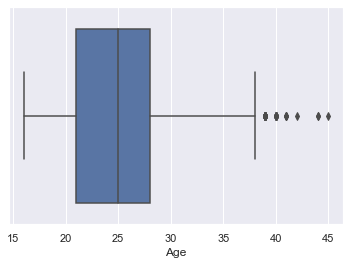

In [13]:
sns.boxplot(fifa["Age"])

In [14]:
q1=np.percentile(fifa["Age"],25)
q3=np.percentile(fifa["Age"],75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
fifa["Age"][(fifa["Age"]<np.abs(lower))|(fifa["Age"]>upper)].max()

45

Hence, there are no outliers in Age.

In [15]:
fifa.Value.unique

<bound method Series.unique of ID
158023    €110.5M
20801        €77M
190871    €118.5M
193080       €72M
192985      €102M
           ...   
238813       €60K
243165       €60K
241638       €60K
246268       €60K
246269       €60K
Name: Value, Length: 17918, dtype: object>

In [16]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 158023 to 246269
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         17918 non-null  object
 1   Age          17918 non-null  int64 
 2   Nationality  17918 non-null  object
 3   Overall      17918 non-null  int64 
 4   Potential    17918 non-null  int64 
 5   Club         17918 non-null  object
 6   Value        17918 non-null  object
 7   Wage         17918 non-null  object
 8   Real Face    17918 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.4+ MB


The goal here is to have only one Value column of their value in euros

In [17]:
fifa["Value2"]=fifa["Value"].apply(lambda x: x.split("€")[1])


In [18]:
fifa["Value3"]=fifa["Value2"].apply(lambda x:x.split("M")[0]*1000000 if x.split("M")==True else x.split("K")[0]*1000)
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real Face,Value2,Value3
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Yes,110.5M,110.5M110.5M110.5M110.5M110.5M110.5M110.5M110....
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Yes,77M,77M77M77M77M77M77M77M77M77M77M77M77M77M77M77M7...
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Yes,118.5M,118.5M118.5M118.5M118.5M118.5M118.5M118.5M118....
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Yes,72M,72M72M72M72M72M72M72M72M72M72M72M72M72M72M72M7...
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Yes,102M,102M102M102M102M102M102M102M102M102M102M102M10...
...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,No,60K,6060606060606060606060606060606060606060606060...
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,No,60K,6060606060606060606060606060606060606060606060...
241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,No,60K,6060606060606060606060606060606060606060606060...


In [19]:
fifa["Value3"]=fifa["Value2"].apply(lambda x: 1 if "M" in x else 0)
fifa["Value4"]=fifa["Value2"].apply(lambda x : x.split("M")[0] if "M" in x else x.split("K")[0]).astype(float)

In [20]:
fifa["Value5"]=(fifa[fifa["Value3"]==1]["Value4"]*1000000)
a=fifa[fifa["Value3"]==0]
fifa["Value5"].fillna(a["Value4"]*1000,inplace=True)

In [21]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Real Face,Value2,Value3,Value4,Value5
ID,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Yes,110.5M,1,110.5,110500000.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Yes,77M,1,77.0,77000000.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Yes,118.5M,1,118.5,118500000.0
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Yes,72M,1,72.0,72000000.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Yes,102M,1,102.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,No,60K,0,60.0,60000.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,No,60K,0,60.0,60000.0
241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,No,60K,0,60.0,60000.0


In [22]:
fifa.drop(["Value4","Value3","Value2","Value"],axis="columns",inplace=True)

Rename value5 column to value

In [23]:
fifa.rename(columns={"Value5":"Value"},inplace=True)


In [24]:
fifa[fifa["Value"]==60000]

,Name,Age,Nationality,Overall,Potential,Club,Wage,Real Face,Value
ID,,,,,,,,,
49212,J. Speroni,39,Argentina,68,68,Crystal Palace,€8K,Yes,60000.0
188017,A. Pomini,37,Italy,68,68,Palermo,€1K,No,60000.0
140181,H. Sogahata,38,Japan,68,68,Kashima Antlers,€3K,No,60000.0
142998,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,€1K,No,60000.0
146636,José Juan,39,Spain,68,68,Elche CF,€1K,No,60000.0
...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€1K,No,60000.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€1K,No,60000.0
241638,B. Worman,16,England,47,67,Cambridge United,€1K,No,60000.0


Change wage to value

In [25]:
fifa["Wage"].unique()

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [26]:
fifa["Wage2"]=fifa["Wage"].apply(lambda x: x.split("€")[1])
fifa["Wage3"]=fifa["Wage2"].apply(lambda x:x.split("K")[0]).astype(float)*1000
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Real Face,Value,Wage2,Wage3
ID,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€565K,Yes,110500000.0,565K,565000.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€405K,Yes,77000000.0,405K,405000.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€290K,Yes,118500000.0,290K,290000.0
193080,De Gea,27,Spain,91,93,Manchester United,€260K,Yes,72000000.0,260K,260000.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€355K,Yes,102000000.0,355K,355000.0


In [27]:
fifa.drop(["Wage","Wage2"],axis="columns",inplace=True)

In [28]:
fifa.rename(columns={"Wage3":"Wage"},inplace=True)

In [29]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage
ID,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,Yes,110500000.0,565000.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Yes,77000000.0,405000.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Yes,118500000.0,290000.0
193080,De Gea,27,Spain,91,93,Manchester United,Yes,72000000.0,260000.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Yes,102000000.0,355000.0
...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,No,60000.0,1000.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,No,60000.0,1000.0
241638,B. Worman,16,England,47,67,Cambridge United,No,60000.0,1000.0


In [30]:
fifa["Nationality"].value_counts()

England                1657
Germany                1195
Spain                  1071
Argentina               935
France                  911
                       ... 
Botswana                  1
New Caledonia             1
Nicaragua                 1
Puerto Rico               1
São Tomé & Príncipe       1
Name: Nationality, Length: 163, dtype: int64

In [31]:
fifa["Nationality"].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

<h3>Countries in Africa</h3>
Senegal , Egypy,Gabon,Morocco,Algeria,Guinea,Ghana,Central African Rep., DR Congo,Ivory Coast,  Mali,Nigeria, Cameroon, Kenya,Cape Verde, Togo,Zimbabwe,Angola,Burkina Faso, Tunisia,Equatorial Guinea, Guinea Bissau,South Africa,Madagascar,Tanzania,Gambia,Benin,COngo,Mozambique,Sierra Leone,Zambia,CHad,Libya,Eritrea,Uganda,Niger,Mauritania,Namibia,Sudan,Ethiopia,Rwanda,South Sudan

### PEOPLE THAT THEIR REAL FACE WAS USED IN FIFA

In [32]:
fifa["RF_Dummy"]=fifa["Real Face"].apply(lambda x: 1 if x=="Yes" else 0)

In [33]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage,RF_Dummy
ID,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,Yes,110500000.0,565000.0,1
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Yes,77000000.0,405000.0,1
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Yes,118500000.0,290000.0,1
193080,De Gea,27,Spain,91,93,Manchester United,Yes,72000000.0,260000.0,1
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Yes,102000000.0,355000.0,1
...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,No,60000.0,1000.0,0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,No,60000.0,1000.0,0
241638,B. Worman,16,England,47,67,Cambridge United,No,60000.0,1000.0,0


We see below that the number of people that their real face was used in FIFA was 1654

In [34]:
rf_used=np.sum(fifa["RF_Dummy"]==1)

In [35]:
rf_notused=np.sum(fifa["RF_Dummy"]==0)

We see that  16264  people's real faces were not used 

In [36]:
(rf_used/fifa.shape[0])*100

9.230940953231388

9.23% of people's real faces were used

In [37]:
(rf_notused/fifa.shape[0])*100

90.7690590467686

We see a whooping percentage of 90.7 % people's real faces were not used

(array([ 1654.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16264.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

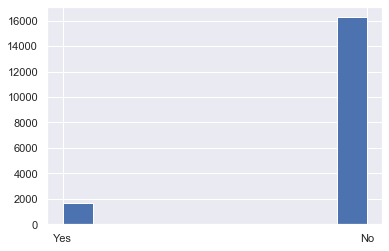

In [38]:
plt.hist(fifa["Real Face"])

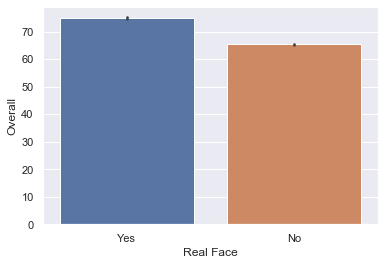

In [39]:
sns.barplot(fifa["Real Face"],fifa["Overall"])

In [40]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage,RF_Dummy
ID,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,Yes,110500000.0,565000.0,1
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Yes,77000000.0,405000.0,1
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Yes,118500000.0,290000.0,1
193080,De Gea,27,Spain,91,93,Manchester United,Yes,72000000.0,260000.0,1
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Yes,102000000.0,355000.0,1
...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,No,60000.0,1000.0,0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,No,60000.0,1000.0,0
241638,B. Worman,16,England,47,67,Cambridge United,No,60000.0,1000.0,0


In [41]:
%matplotlib
sns.barplot(fifa["Overall"],fifa["RF_Dummy"])

Using matplotlib backend: Qt5Agg


From this graph , we see that there is a high likelihood of a player with overall rating of 79 and above for his real face to be used in the FIFA game.


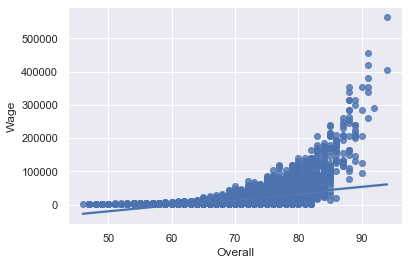

In [42]:
%matplotlib inline
sns.regplot(fifa["Overall"],fifa["Wage"])

In [43]:
from scipy.stats import pearsonr
pearsonr(fifa["Overall"],fifa["Wage"])

(0.5759399789201671, 0.0)

In [44]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage,RF_Dummy
ID,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,Yes,110500000.0,565000.0,1
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Yes,77000000.0,405000.0,1
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Yes,118500000.0,290000.0,1
193080,De Gea,27,Spain,91,93,Manchester United,Yes,72000000.0,260000.0,1
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Yes,102000000.0,355000.0,1
...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,No,60000.0,1000.0,0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,No,60000.0,1000.0,0
241638,B. Worman,16,England,47,67,Cambridge United,No,60000.0,1000.0,0


Overall does not really affect wage!!!!
<br>WOW!!

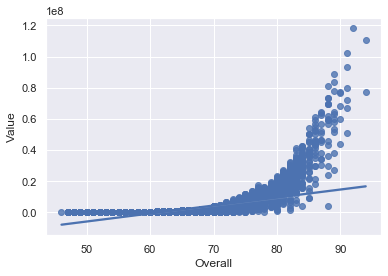

In [45]:
sns.regplot(fifa["Overall"],fifa["Value"])

In [46]:
pearsonr(fifa["Overall"],fifa["Value"])

(0.6313947738295723, 0.0)

Overall player rating does not have much correlation on a player's value too

In [47]:
fifa.corr()

,Age,Overall,Potential,Value,Wage,RF_Dummy
Age,1.000000,0.453252,-0.252799,0.077274,0.143944,0.148995
Overall,0.453252,1.000000,0.660850,0.631395,0.575940,0.399307
Potential,-0.252799,0.660850,1.000000,0.579482,0.488999,0.321794
Value,0.077274,0.631395,0.579482,1.000000,0.858030,0.442939
Wage,0.143944,0.575940,0.488999,0.858030,1.000000,0.495561
RF_Dummy,0.148995,0.399307,0.321794,0.442939,0.495561,1.000000


The only strong correlation in this dataset is between Player's Wage and Player's Value for sale and this is reasonable

In [48]:
fifa[(fifa["Overall"]>60)&(fifa["Overall"]<80)]

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage,RF_Dummy
ID,,,,,,,,,,
244369,V. Tsygankov,20,Ukraine,79,86,Dynamo Kyiv,No,18000000.0,1000.0,0
239818,Rúben Dias,21,Portugal,79,85,SL Benfica,No,15000000.0,10000.0,0
236632,David Neres,21,Brazil,79,86,Ajax,No,18000000.0,18000.0,0
233419,Raphinha,21,Brazil,79,86,Sporting CP,No,18000000.0,13000.0,0
232097,A. Harit,21,Morocco,79,86,FC Schalke 04,No,18000000.0,27000.0,0
...,...,...,...,...,...,...,...,...,...,...
220669,F. Okenabirhie,22,Nigeria,61,70,Shrewsbury,No,400000.0,2000.0,0
244989,J. Aguilera,18,Chile,61,77,Colo-Colo,No,525000.0,1000.0,0
216318,S. Warmolts,24,Netherlands,61,66,FC Emmen,No,290000.0,1000.0,0


### FOR AFRICAN PLAYERS

In [49]:
africa=["Senegal" , "Egypyt","Gabon","Morocco","Algeria","Guinea","Ghana","Central African Rep.", "DR Congo","Ivory Coast",  "Mali","Nigeria", "Cameroon", "Kenya","Cape Verde", "Togo","Zimbabwe","Angola","Burkina Faso", "Tunisia","Equatorial Guinea", "Guinea Bissau","South Africa","Madagascar","Tanzania","Gambia","Benin","Congo","Mozambique","Sierra Leone","Zambia","Chad","Libya","Eritrea","Uganda","Niger","Mauritania","Namibia","Sudan","Ethiopia","Rwanda","South Sudan"]

In [50]:
fifa_africa=fifa[fifa["Nationality"].isin(africa)]

In [51]:
fifa_africa.corr()

,Age,Overall,Potential,Value,Wage,RF_Dummy
Age,1.000000,0.383332,-0.338340,0.069820,0.159849,0.177128
Overall,0.383332,1.000000,0.662927,0.716703,0.642623,0.417007
Potential,-0.338340,0.662927,1.000000,0.631987,0.500837,0.282392
Value,0.069820,0.716703,0.631987,1.000000,0.826763,0.450095
Wage,0.159849,0.642623,0.500837,0.826763,1.000000,0.561230
RF_Dummy,0.177128,0.417007,0.282392,0.450095,0.561230,1.000000


For African players, Their overall fifa rating is strongly positively correlated with Value

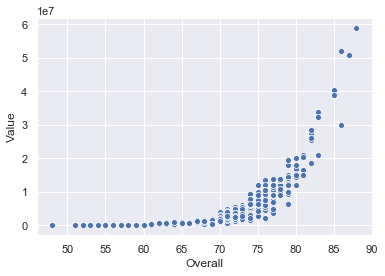

In [52]:
sns.scatterplot(fifa_africa["Overall"],fifa_africa["Value"])

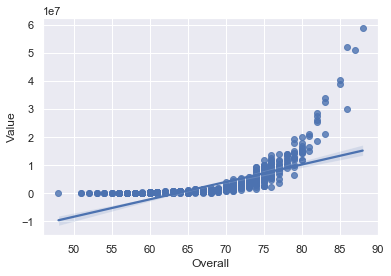

In [53]:
sns.regplot(fifa_africa["Overall"],fifa_africa["Value"])

Wage is also positively correlated with value of the player

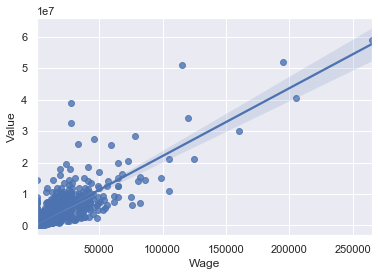

In [54]:
sns.regplot(fifa_africa["Wage"],fifa_africa["Value"])

# MACHINE LEARNING

Using Player features like Overall, Potential,Age to predict Player's Value and wage

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
model=LinearRegression()

In [57]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Real Face,Value,Wage,RF_Dummy
ID,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,Yes,110500000.0,565000.0,1
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Yes,77000000.0,405000.0,1
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Yes,118500000.0,290000.0,1
193080,De Gea,27,Spain,91,93,Manchester United,Yes,72000000.0,260000.0,1
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Yes,102000000.0,355000.0,1


In [58]:
fifa=fifa.reset_index()

In [59]:
X=fifa[["Age","Overall","Potential","Wage"]]

In [60]:
y=fifa["Value"]

Using Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
models={"lr":{
    "model":LinearRegression()
},
       "svr":{
           "model":SVR()
       },
       "dtr":{
           "model":DecisionTreeRegressor()
       },
       "gbr":{
           "model":GradientBoostingRegressor()
       },
       "rtr":{
           "model":RandomForestRegressor()
       }}

In [64]:
for name,model in models.items():
    pre=model["model"].fit(Xtrain,ytrain)
    print(f"The accuracy of {name} is {pre.score(Xtest,ytest)}")

The accuracy of lr is 0.7653629676583493
The accuracy of svr is -0.1016543776345682
The accuracy of dtr is 0.9430318007879925
The accuracy of gbr is 0.9743533897584312
The accuracy of rtr is 0.9768397740544608


Here, GradientBoostingRegressor is the best model

In [65]:
gbr=GradientBoostingRegressor().fit(Xtrain,ytrain)
print(f"Your training accuracy is {gbr.score(Xtrain,ytrain)} while your test accuracy is {gbr.score(Xtest,ytest)}")

Your training accuracy is 0.9864649212306894 while your test accuracy is 0.9742897658748668


In [66]:
ypred=gbr.predict(Xtest)

In [67]:
gbr.predict([[20,76,78,50000]])

array([8136756.819326])

In [68]:
mean_absolute_error(ytest,ypred)

309376.9961782614

In [69]:
mean_squared_error(ytest,ypred)

804967781465.1786

In [70]:
np.sqrt(mean_squared_error(ytest,ypred))

897199.9673791671

In [83]:
pickle.dump(gbr,open("model.pkl","wb"))

In [84]:
model=pickle.load(open("model.pkl","rb"))